<a href="https://colab.research.google.com/github/filipefelisardo/Clepsydra/blob/main/precipitacoes2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               DATA  ABRANTES (17H/01C)  ALCANENA (17F/02CG)  \
0  01/01/2019 09:00                31.2                 23.9   
1  01/02/2019 09:00                30.9                 47.2   
2  01/03/2019 09:00                13.8                 40.9   
3  01/04/2019 09:00                 0.4                100.4   
4  01/05/2019 09:00                 0.0                 14.7   

   ALCOENTRE (18D/03C)  ALCÁÇOVAS (23I/01C)  BARRAGEM DE CAMPILHAS (26F/02C)  \
0                  NaN                  NaN                              NaN   
1                  NaN                  NaN                              NaN   
2                  NaN                  NaN                              NaN   
3                  0.9                  NaN                             49.5   
4                  0.4                  NaN                              1.7   

   BARRAGEM DE MAGOS (20E/01C)  BARRAGEM DE ODIVELAS (24I/03C)  \
0                          NaN                             NaN   
1 

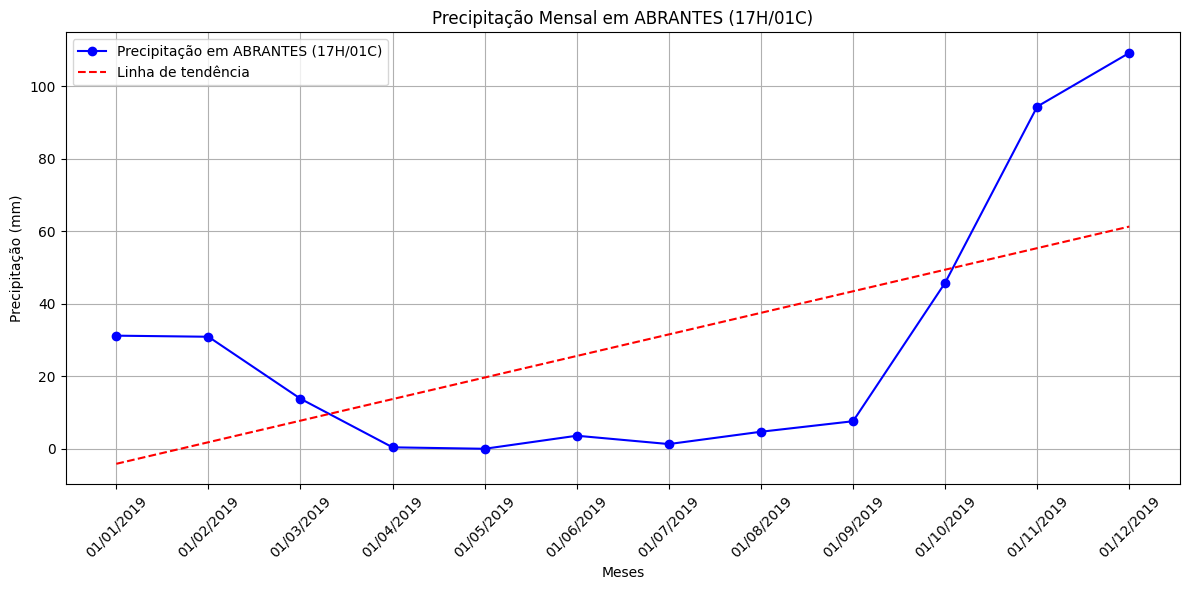

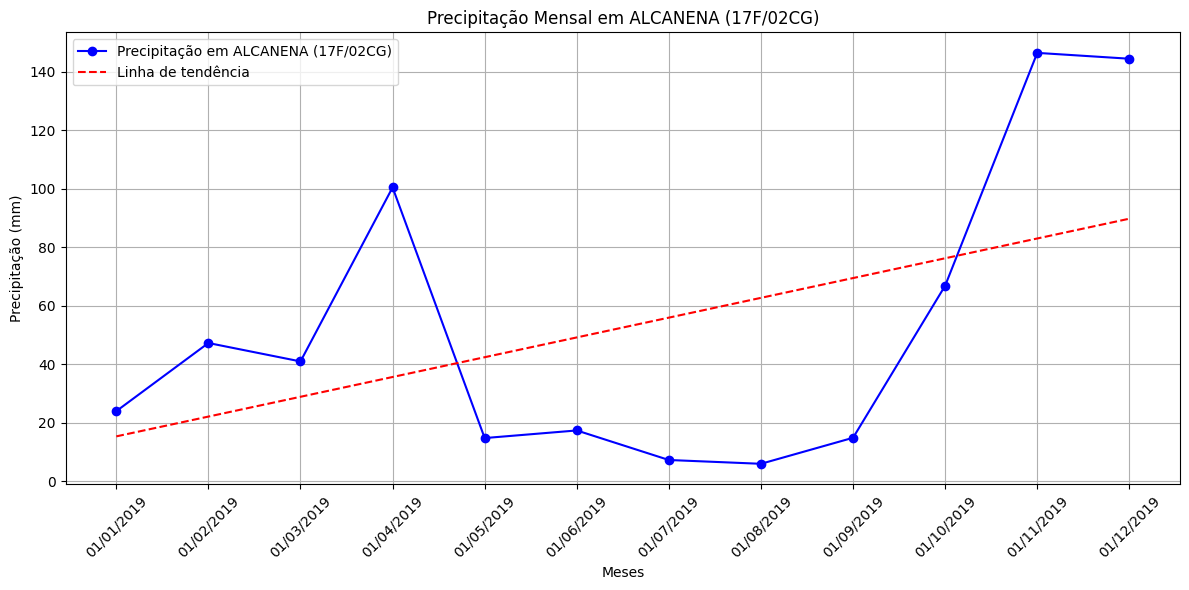

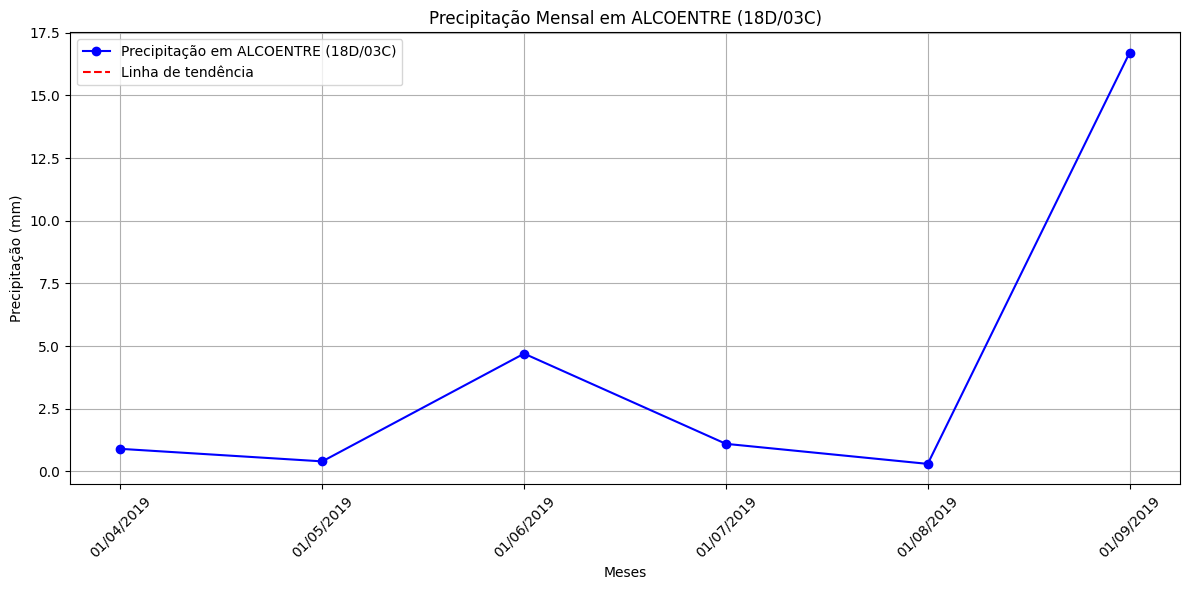

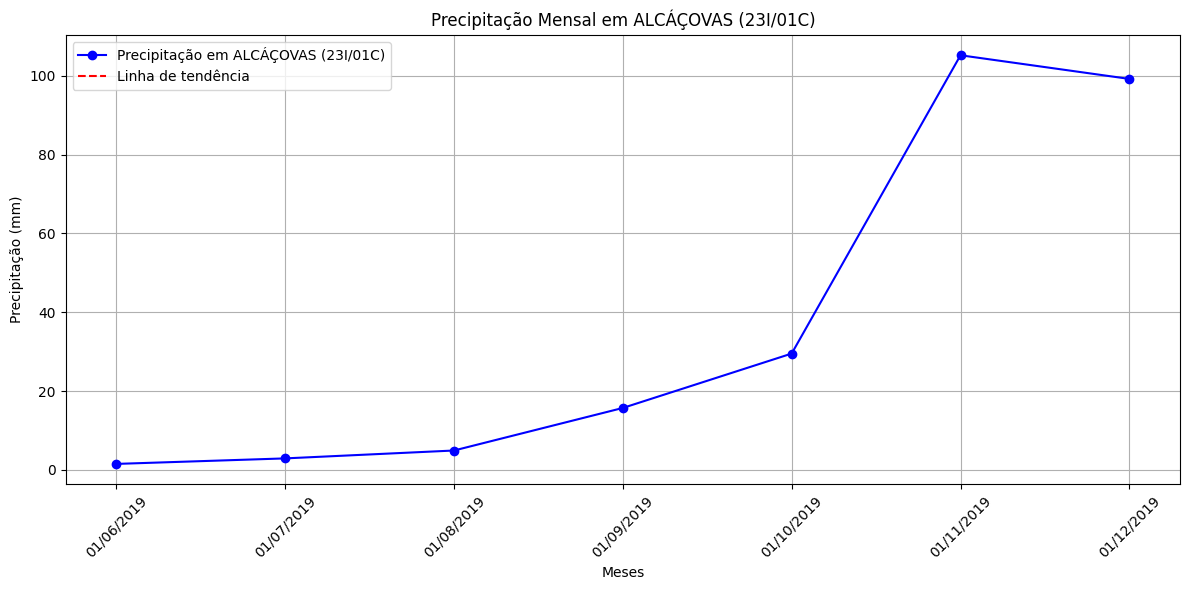

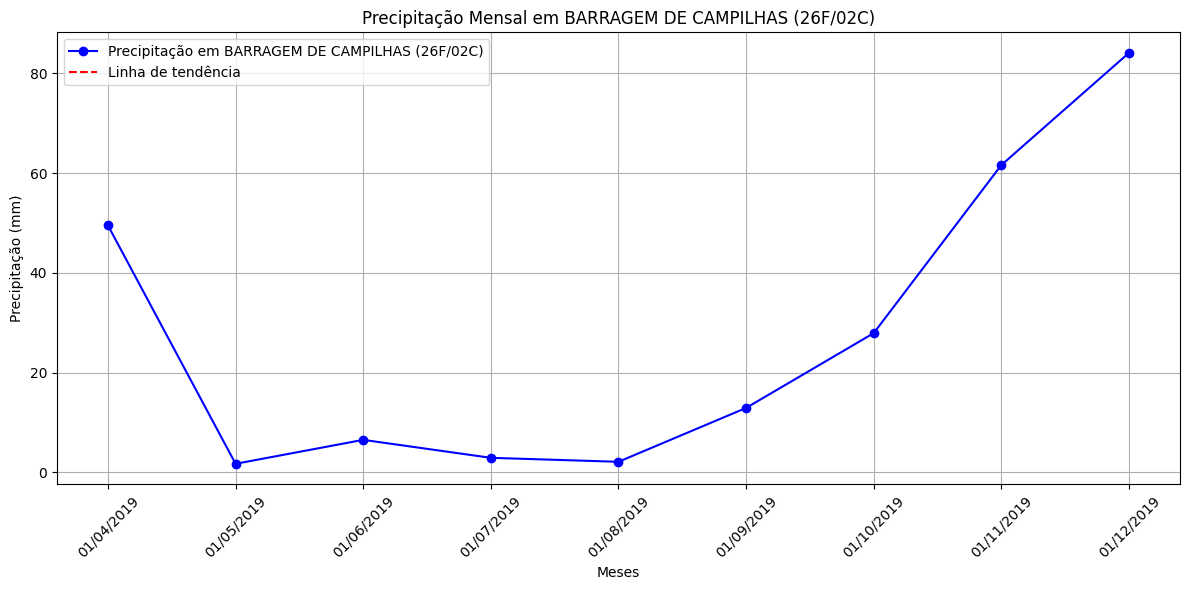

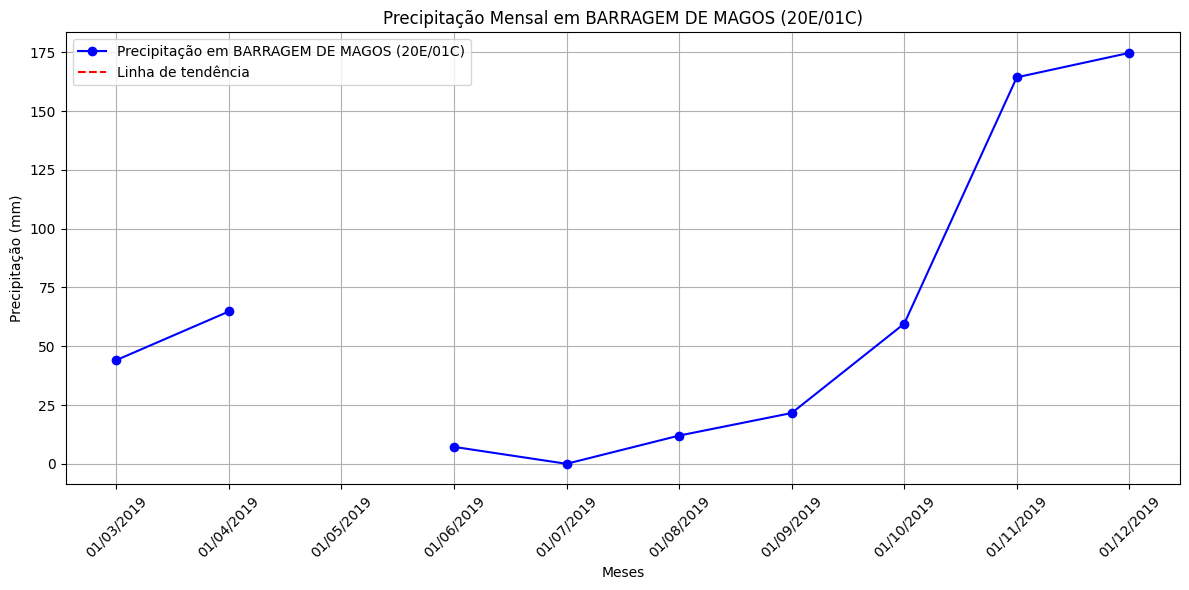

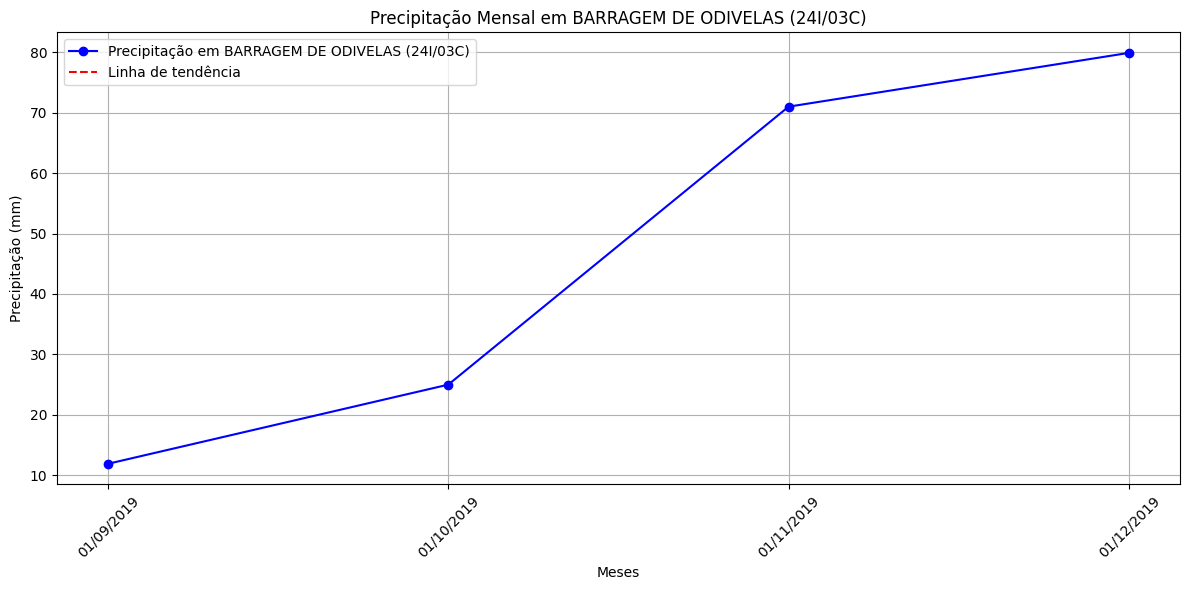

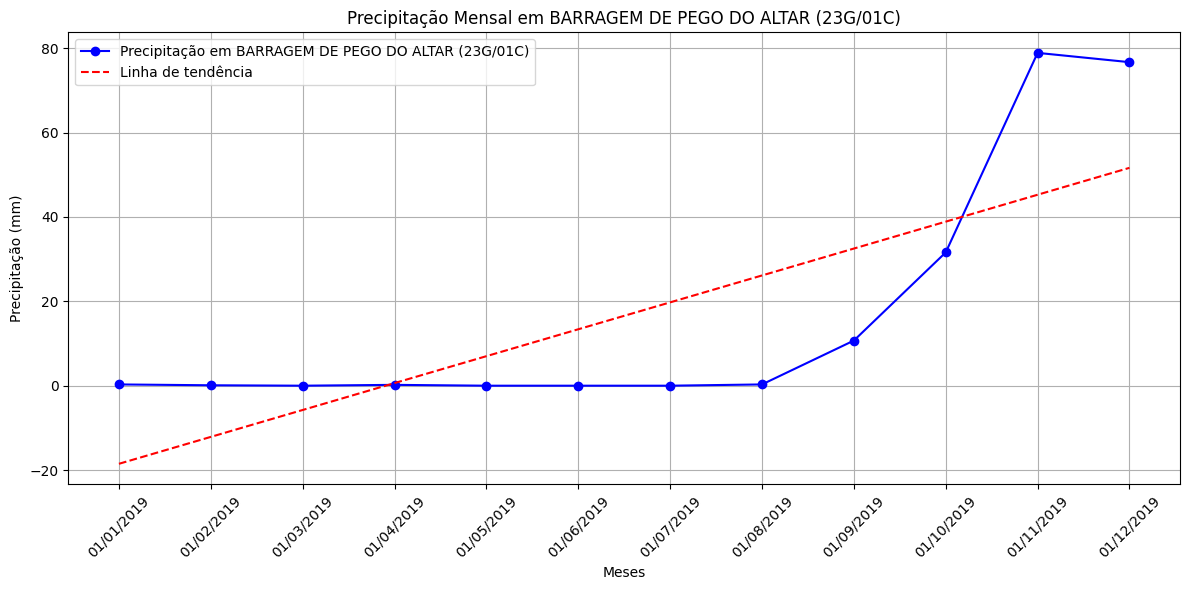

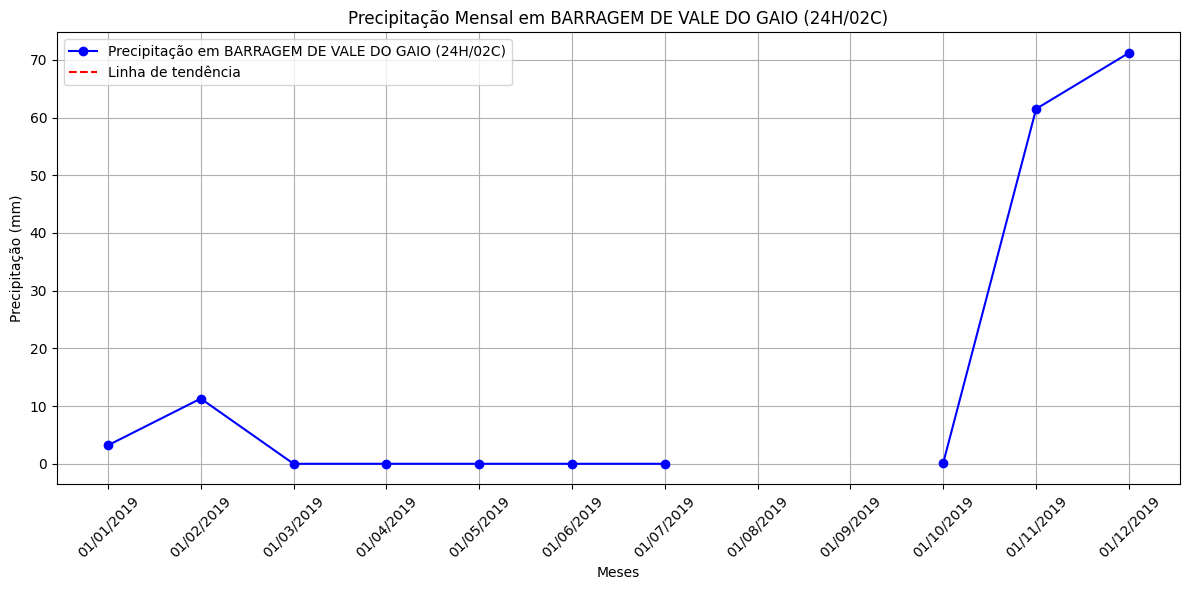

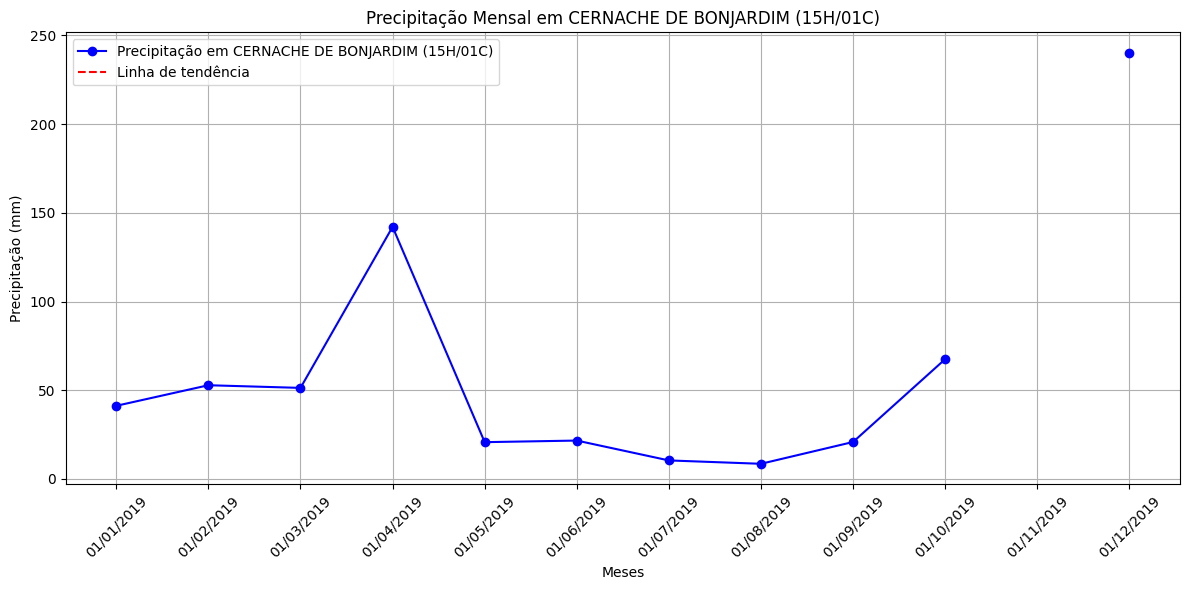

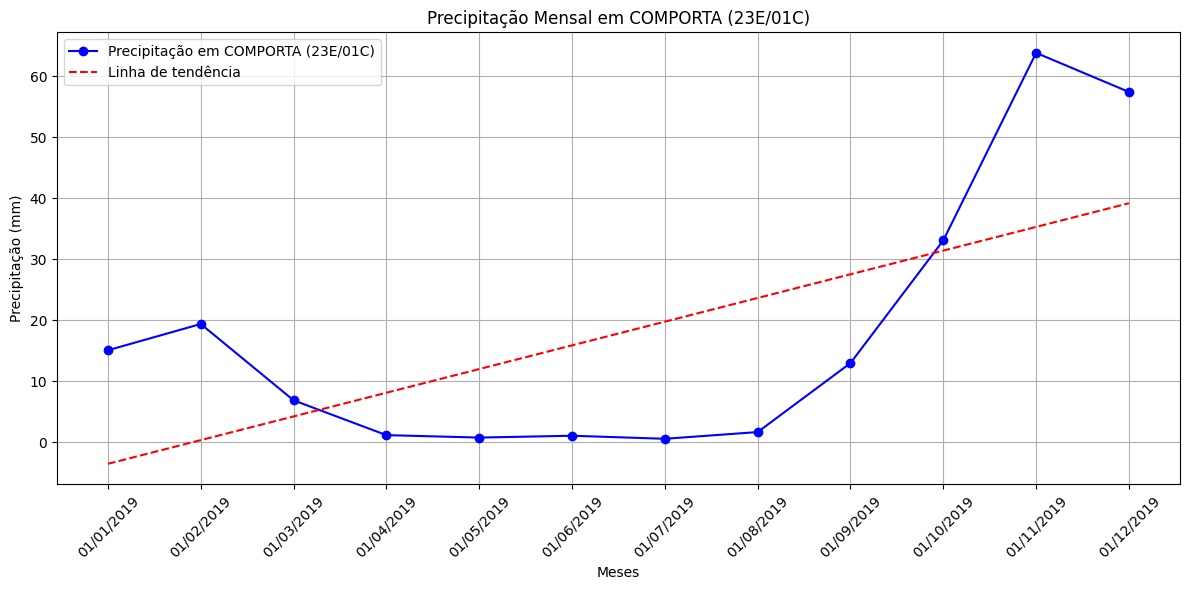

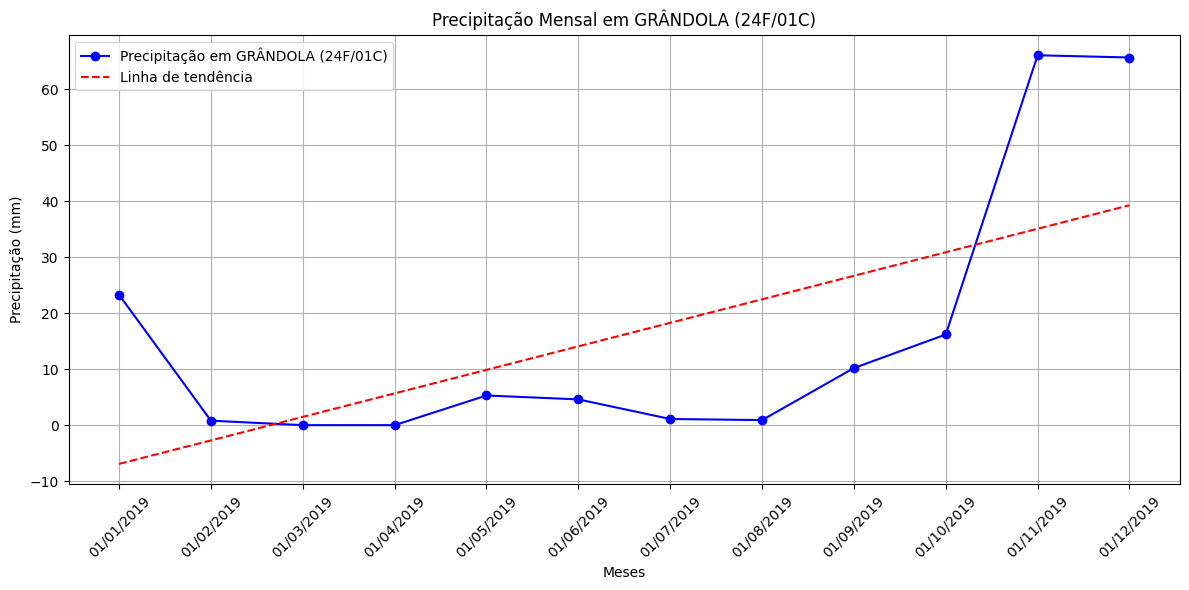

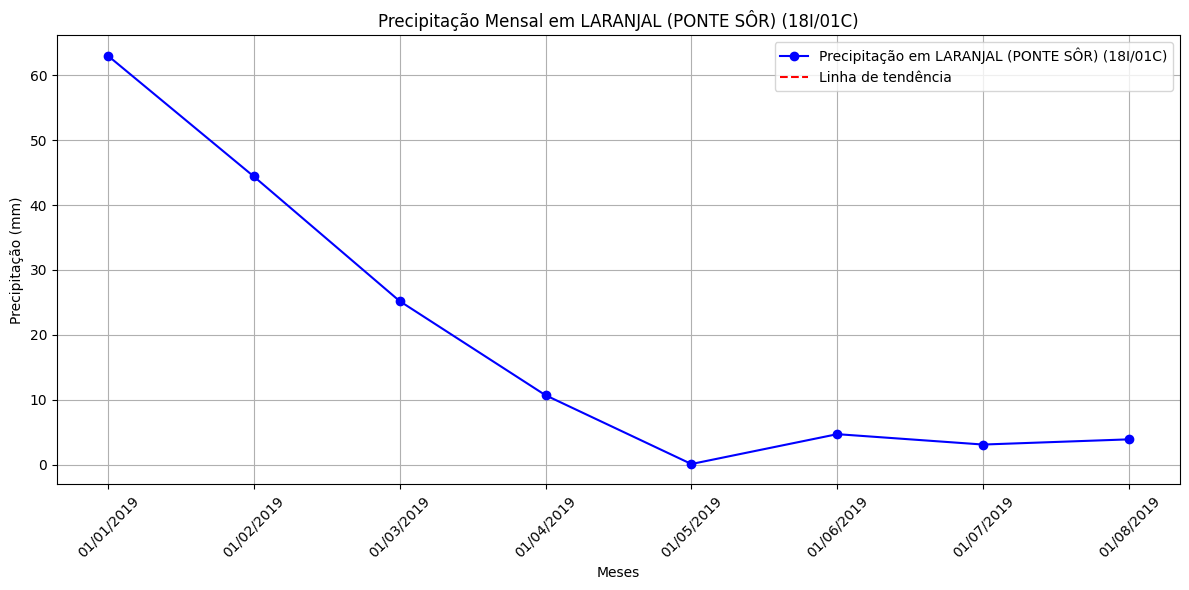

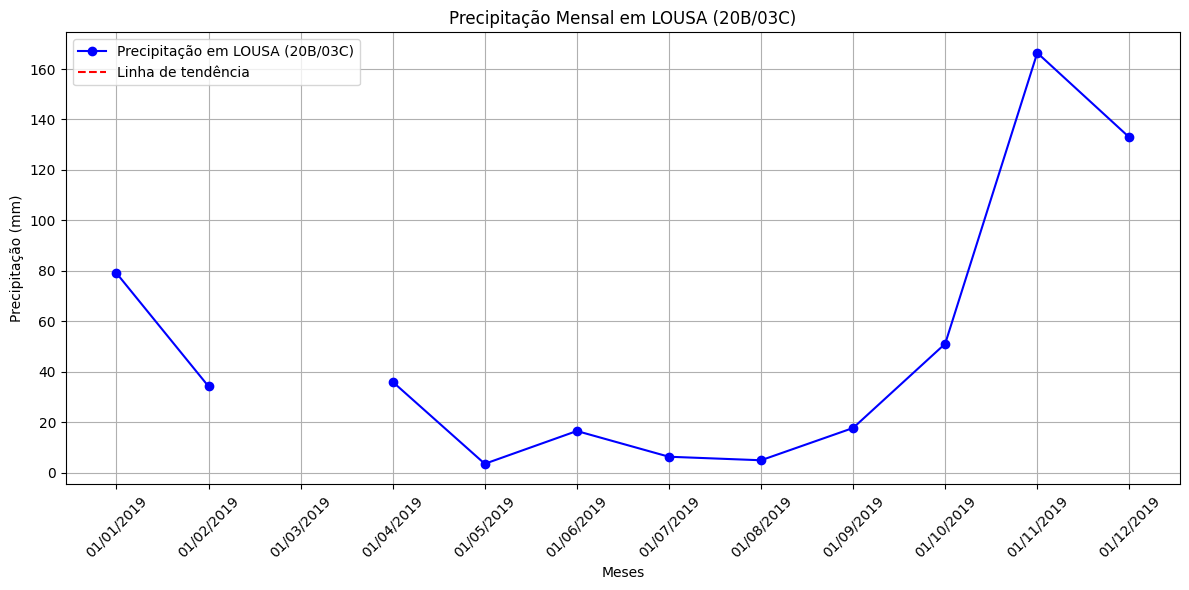

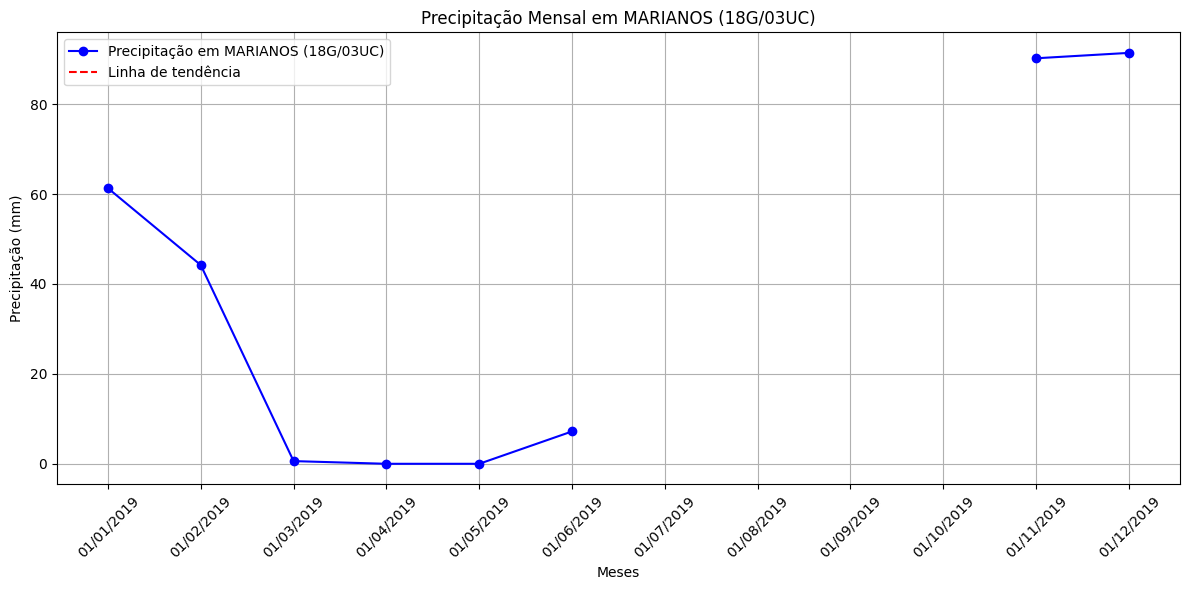

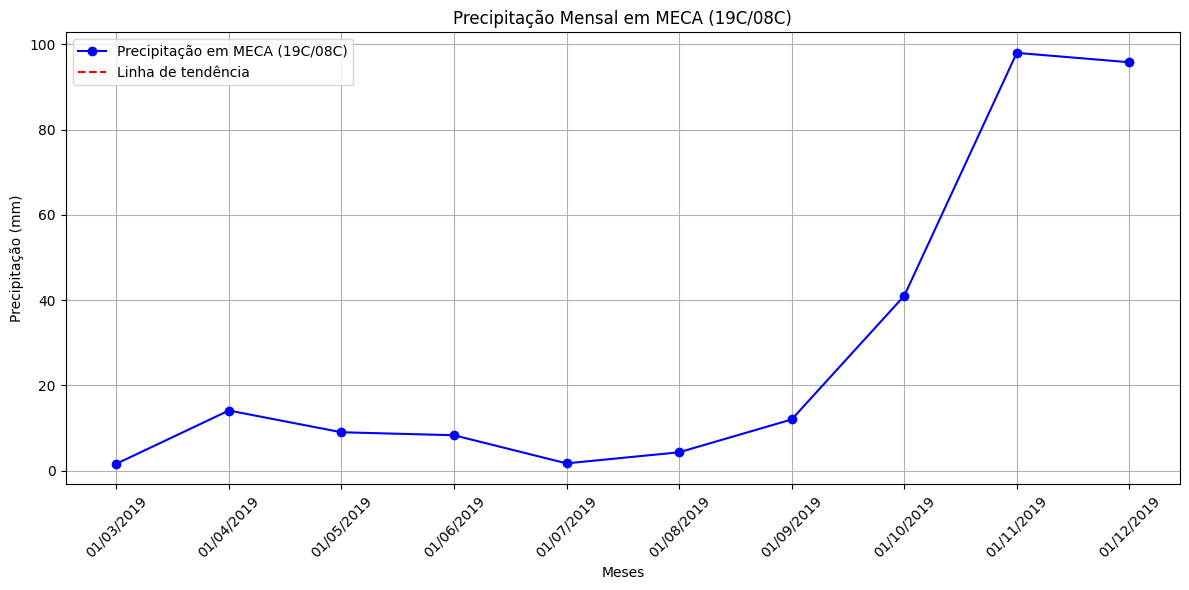

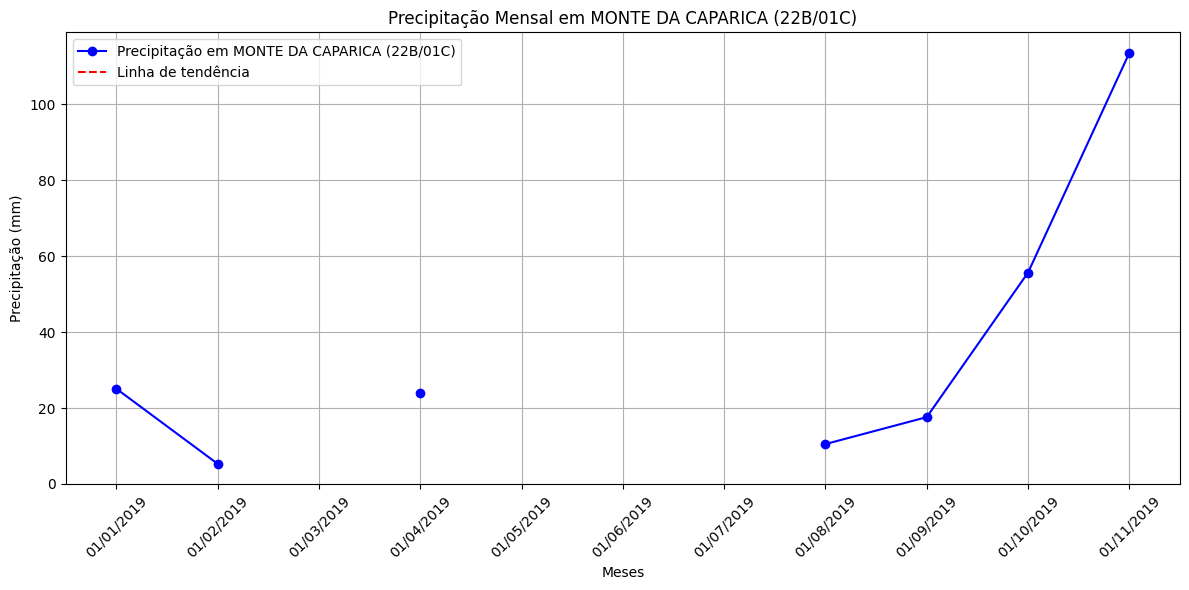

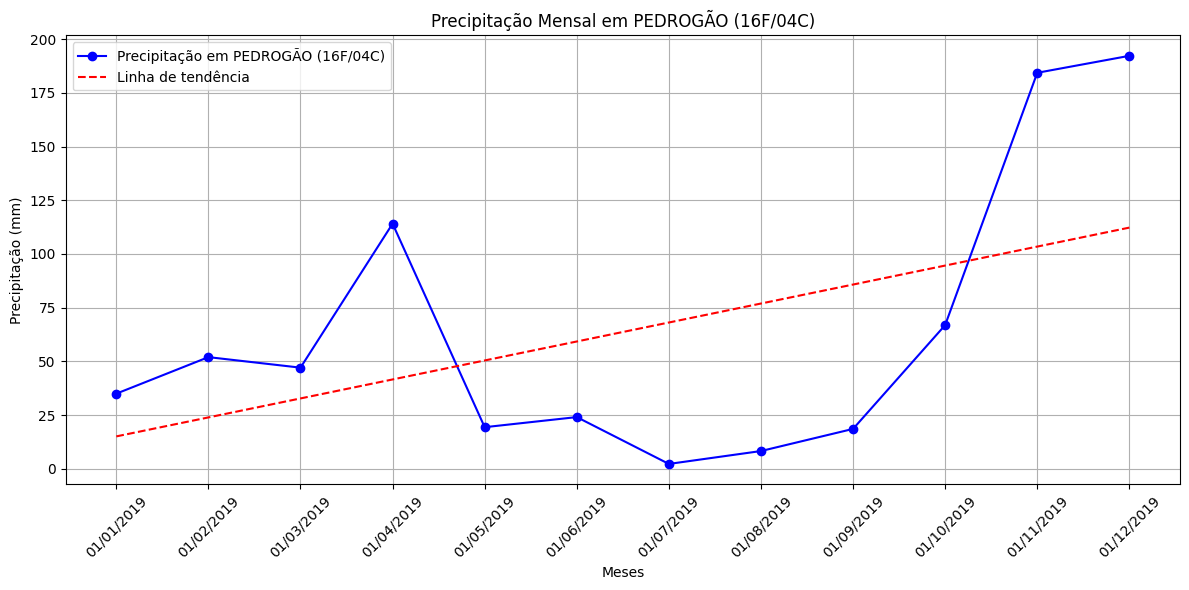

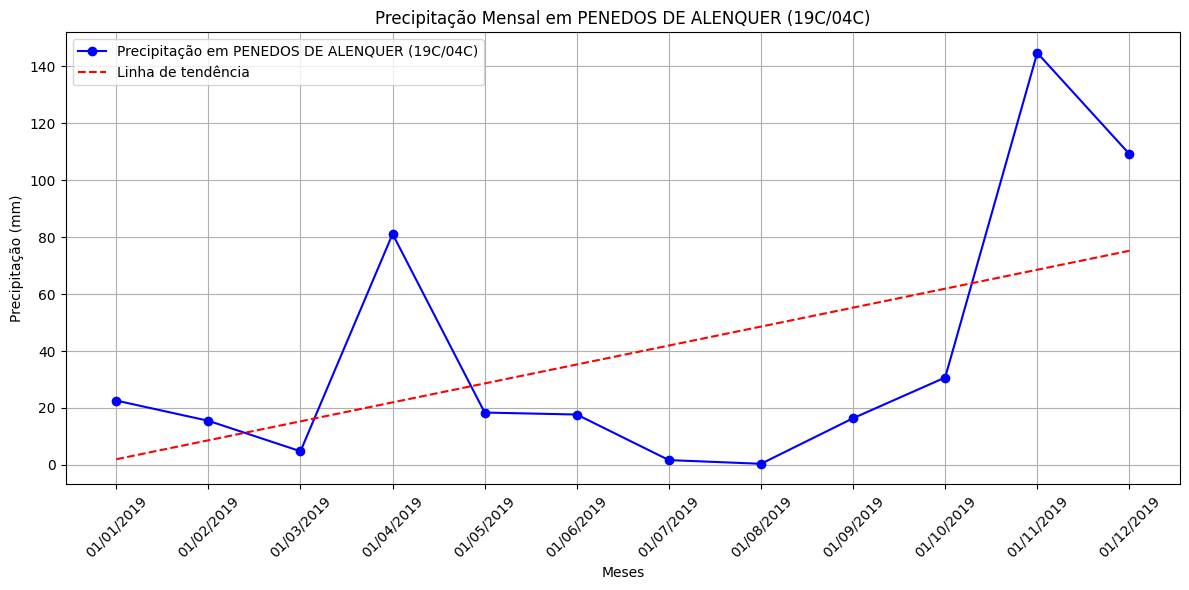

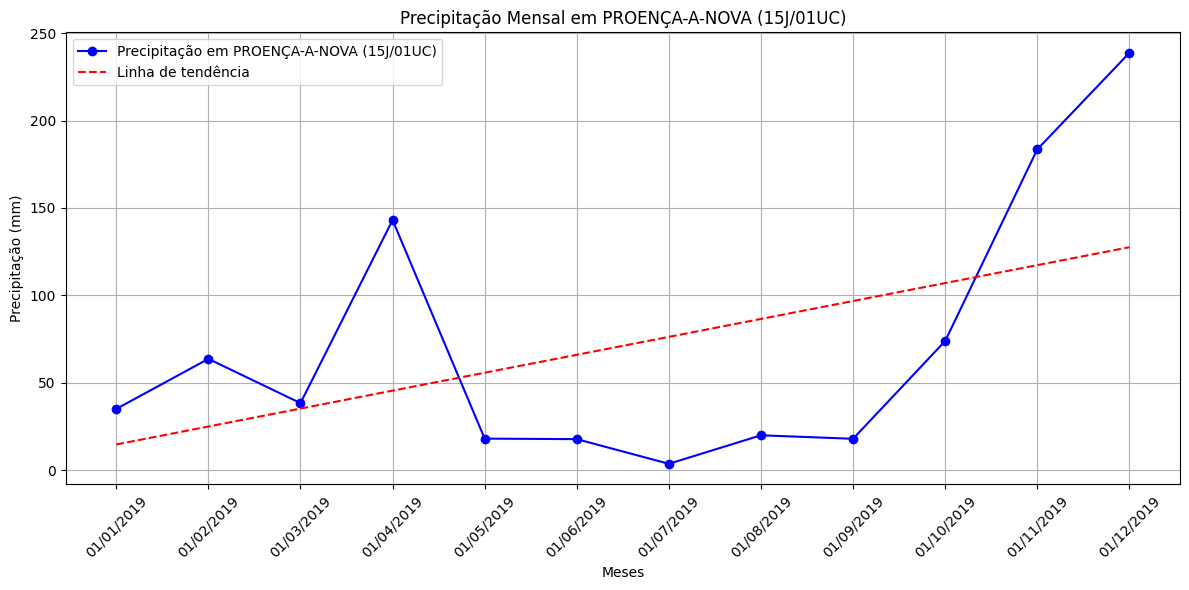

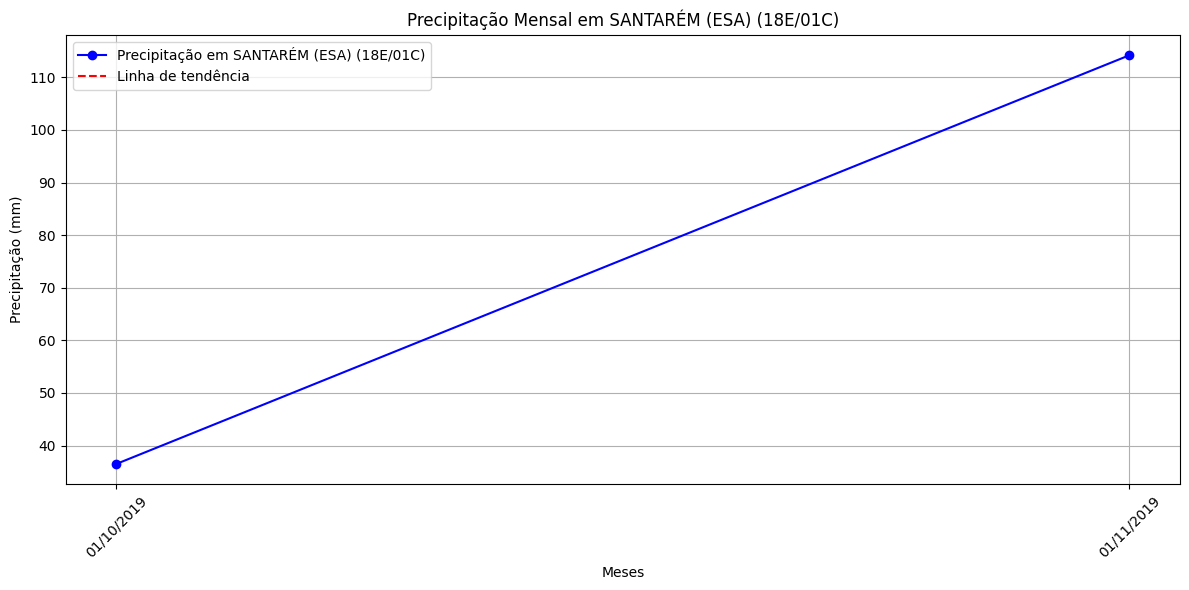

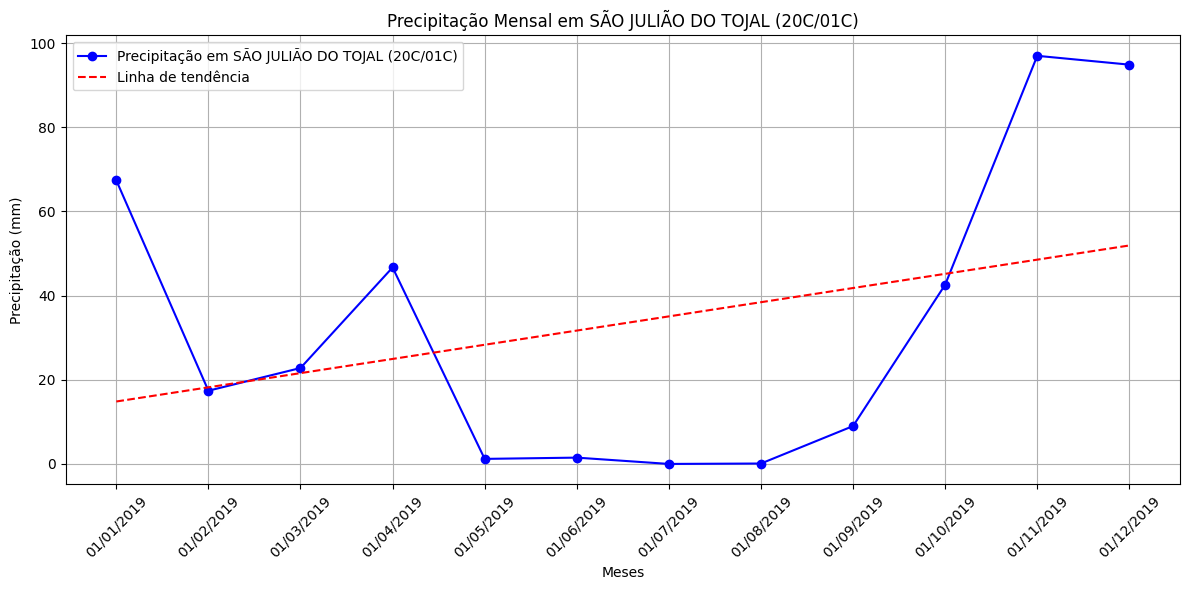

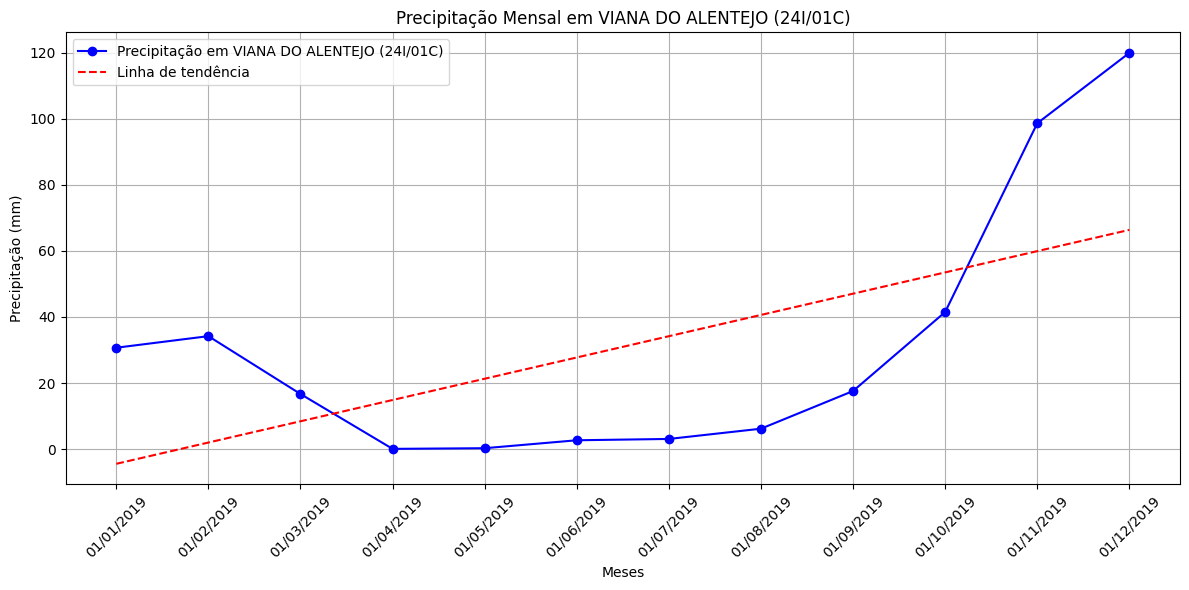

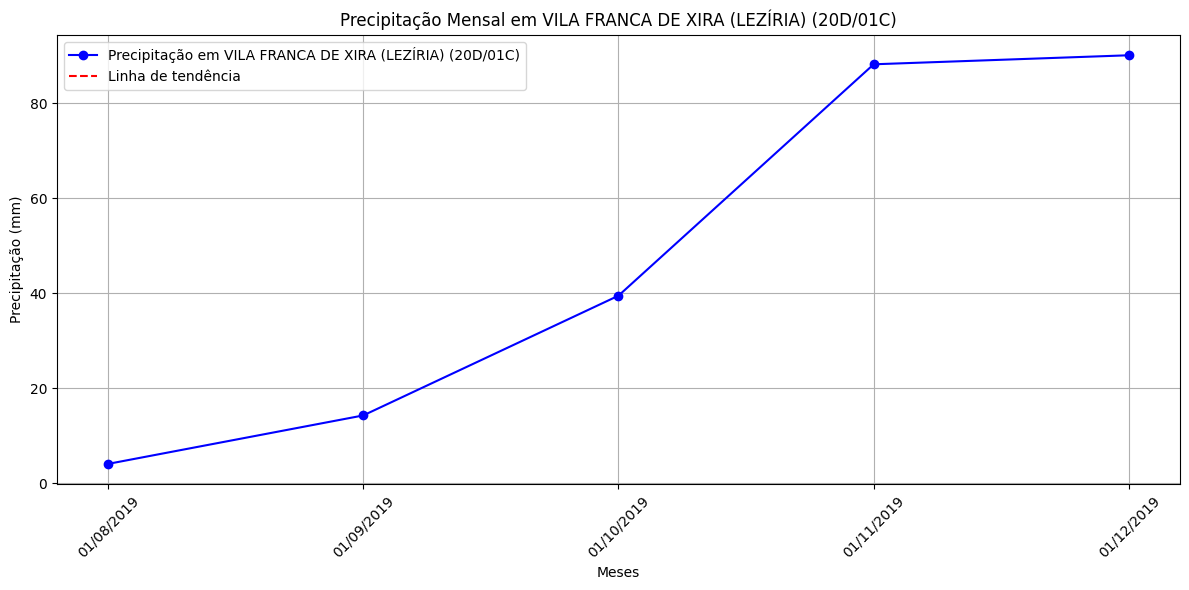

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo XLSX
file_path = 'precipitacoes_mensais_2019.xlsx'  # Atualize para o caminho correto do seu arquivo
df = pd.read_excel(file_path)

# Verificar as primeiras linhas do dataframe para entender a estrutura dos dados
print(df.head())

# Assumindo que a primeira coluna contém os meses e as outras colunas são estações
df['DATA'] = df['DATA'].str[:10]  # Extraindo apenas a data
df.set_index('DATA', inplace=True)

# Verificar o índice e colunas do dataframe
print(df.index)
print(df.columns)

# Função para adicionar linha de tendência
def add_trendline(ax, x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='r', label='Linha de tendência')

# Plotar gráficos de precipitação para cada estação
for column in df.columns:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df.index))
    y = df[column].astype(float).values
    plt.plot(df.index, y, label=f'Precipitação em {column}', color='b', linestyle='-', marker='o')

    # Adicionar linha de tendência
    ax = plt.gca()
    add_trendline(ax, x, y)

    plt.title(f'Precipitação Mensal em {column}')
    plt.xlabel('Meses')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
